In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# df = pd.read_csv("data/final_data_one_hot.csv")
# df.head(3)

In [51]:
df = pd.read_csv("data/final_data_min_lists.csv")
df.head(3)

,runtime,audience_rating,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,...,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,directors,actors,production_company
0,119.0,53.0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,115,334,2
1,90.0,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,490,58,5
2,109.0,37.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,53,514,1


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=69)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import ast
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(r2)


0.2852639142527754


In [54]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix

# model = LogisticRegression()

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print(accuracy_score(y_pred, y_test))
# print(confusion_matrix(y_pred, y_test))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae_errors = []
mse_errors = []
for k in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)


  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)


  mae_errors.append(mae)
  mse_errors.append(mse)

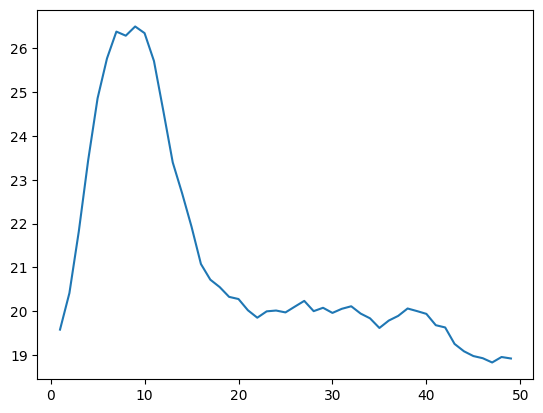

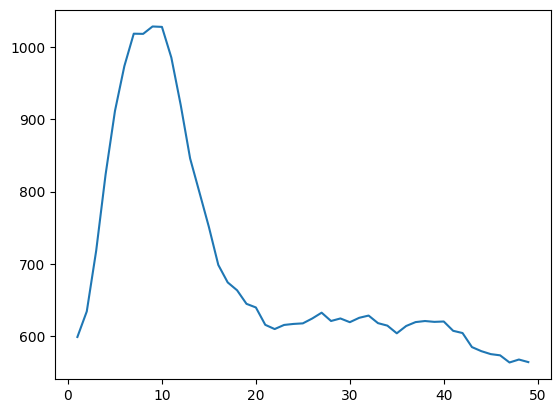

In [56]:
plt.plot(range(1, 50), mae_errors)
plt.show()
plt.plot(range(1, 50), mse_errors)
plt.show()

In [57]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [58]:
data = {
  'name': 'A Minecraft Movie',
  'directors': ['Jared Hess'],
  'actors': ['Jack Black',
             'Emma Myers', 
             'Jemaine Clement',
             'Jason Momoa',
             'Jennifer Coolidge'
             'Kate McKinnon',
             'Danielle Brooks',
             'Sebastian Hansen'
            ],
  'production_company': 'Warner Bros. Pictures', # it looks like production company is actually the distributor
  'genres': ['Kids & Family', 'Action & Adventure', 'Science Fiction & Fantasy'],
  'content_rating': 'PG', # not final but likely
  'runtime': '100', # runtime not released yet, so use average
}

In [59]:
import json

with open('data/director_encoding.json', 'r') as file:
    director_encoding = json.load(file)

with open('data/actor_encoding.json', 'r') as file:
    actor_encoding = json.load(file)

with open('data/production_company_encoding.json', 'r') as file:
    production_company_encoding = json.load(file)

columns = df.drop('audience_rating', axis=1).columns

def encode(data):

  new_row = {}

  if 'directors' in data:
    min_director = float('inf')
    for director in data['directors']:
      if director in director_encoding:
        encoding = director_encoding[director]
        min_director = min(min_director, encoding)
    
    new_row[f'directors'] = min_director

  if 'actors' in data:
    min_actor = float('inf')
    for actor in data['actors']:
      if actor in actor_encoding:
        encoding = actor_encoding[actor]
        min_actor = min(min_actor, encoding)
    new_row[f'actors'] = min_actor

  if 'production_company' in data:
    production_company = data['production_company']
    if production_company in production_company_encoding:
      encoding = production_company_encoding[production_company]
      new_row[f'production_company'] = encoding
  
  if 'genres' in data:
    for genre in data['genres']:
      if genre in columns:
        new_row[genre] = 1

  if 'content_rating' in data:
    content_rating = data['content_rating']
    if content_rating in columns:
      new_row[content_rating] = 1

  if 'runtime' in data:
     new_row['runtime'] = data['runtime']

  print(new_row)
  new_row = pd.DataFrame(new_row, index=[0])
  new_row = new_row.reindex(columns=columns, fill_value=0)

  return new_row
    
  # df = pd.concat([new_df, new_row], ignore_index=True)

new_data = encode(data)

new_data

{'directors': 281, 'actors': 102, 'production_company': 1, 'Kids & Family': 1, 'Action & Adventure': 1, 'Science Fiction & Fantasy': 1, 'PG': 1, 'runtime': '100'}


,runtime,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,Anime & Manga,...,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,directors,actors,production_company
0,100,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,281,102,1


In [60]:
new_pred = knn.predict(new_data)

new_pred

array([59.])